# BMI Calculator Workflow with LangGraph

This notebook demonstrates how to create a simple **sequential workflow** using LangGraph to calculate Body Mass Index (BMI) and categorize the result.

## What is BMI?
Body Mass Index (BMI) is a measure that uses height and weight to determine if a person's weight is healthy. The formula is:

**BMI = weight (kg) / height (m)²**

## Workflow Overview
Our workflow consists of two sequential steps:
1. **Calculate BMI**: Takes height and weight, computes the BMI value
2. **Categorize BMI**: Takes the calculated BMI and assigns a health category

Let's build this step by step!

## Import Required Libraries

First, let's import the necessary components from LangGraph to build our workflow:

In [9]:
from langgraph.graph import StateGraph, START, END
from typing import TypedDict

## Define the State Structure

In LangGraph, we use a **TypedDict** to define the structure of our state. This state will be passed between nodes in our workflow and will store all the data we need.

In [10]:
# define state

class BMIState(TypedDict):
    height: float  # in meters
    weight: float  # in kilograms
    bmi: float     # body mass index
    category: str  # BMI category

## Step 1: BMI Calculation Function

This function takes the height and weight from our state and calculates the BMI using the standard formula. The result is rounded to 2 decimal places for better readability.

In [11]:
def calculate_bmi(state: BMIState) -> BMIState:
    weight = state['weight']
    height = state['height']
    bmi = weight / (height ** 2)
    state['bmi'] = round(bmi, 2)
    
    return state

## Step 2: BMI Categorization Function

This function takes the calculated BMI and categorizes it according to standard health guidelines:

- **Underweight**: BMI < 18.5
- **Normal weight**: BMI 18.5 - 24.9
- **Overweight**: BMI 25.0 - 29.9  
- **Obesity**: BMI ≥ 30.0

In [12]:
def label_bmi_category(state: BMIState) -> BMIState:
    bmi = state['bmi']
    
    if bmi < 18.5:
        category = 'Underweight'
    elif 18.5 <= bmi < 24.9:
        category = 'Normal weight'
    elif 25 <= bmi < 29.9:
        category = 'Overweight'
    else:
        category = 'Obesity'
        
    state['category'] = category
    return state

## Building the Workflow Graph

Now we'll create our LangGraph workflow by:

1. **Creating a StateGraph**: Initialize with our BMIState structure
2. **Adding nodes**: Each function becomes a node in our graph
3. **Adding edges**: Define the execution flow between nodes
4. **Compiling**: Create the executable workflow

The flow will be: 

<img src="bmi_workflow.png">

In [13]:
# define graph

bmi_graph = StateGraph(BMIState)

# add nodes

bmi_graph.add_node('calculate_bmi',calculate_bmi)
bmi_graph.add_node('label_bmi_category',label_bmi_category)

# add edges

bmi_graph.add_edge(START, 'calculate_bmi')
bmi_graph.add_edge('calculate_bmi', 'label_bmi_category')
bmi_graph.add_edge('label_bmi_category', END)

# compile graph

workflow =  bmi_graph.compile()


## Testing the Workflow

Let's test our workflow with sample data:
- **Height**: 1.75 meters (5'9")
- **Weight**: 70.0 kg (154 lbs)

In [14]:
intial_state = {
    'height': 1.75,
    'weight': 70.0 
}

### Execute the Workflow

Now let's run our workflow and see the results:

In [15]:
final_state = workflow.invoke(intial_state)
print(final_state)

{'height': 1.75, 'weight': 70.0, 'bmi': 22.86, 'category': 'Normal weight'}


## Visualize the Workflow Graph

Let's visualize our workflow to better understand the execution flow:

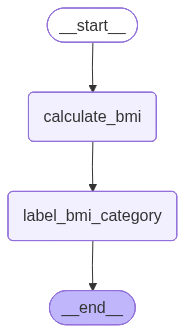

In [16]:
from IPython.display import Image
Image(workflow.get_graph().draw_mermaid_png())